<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Пример: rougher.input.feed_ag

Возможные значения для блока [этап]:  
rougher — флотация  
primary_cleaner — первичная очистка  
secondary_cleaner — вторичная очистка  
final — финальные характеристики  

Возможные значения для блока [тип_параметра]:  

input — параметры сырья  
output — параметры продукта  
state — параметры, характеризующие текущее состояние этапа  
calculation — расчётные характеристики  


In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_columns', None)
r = 12345

## Подготовка данных

In [2]:
train_raw = pd.read_csv('gold_industry_train.csv')
test_raw = pd.read_csv('gold_industry_test.csv')
full_raw = pd.read_csv('gold_industry_full.csv')

Посмотрим общую информацию о датасетах

In [3]:
def get_info(data):
    display('data shape:', data.shape)
    display('data samples', data.sample(3))
    display(data.info())
    display('num of duplicates:', data.duplicated().sum())
    display('Кол-во строк с пропусками', data.isna().any(axis=1).sum())

In [4]:
get_info(train_raw)

'data shape:'

(14579, 87)

'data samples'

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
9839,2017-04-30 17:59:59,8.432226,7.743732,3.390156,42.932208,604.130155,60.378428,17.000956,6.998730,997.557539,-299.828220,1303.231848,-500.638667,1253.905337,-500.031749,1202.719355,-499.656950,998.986420,-499.693343,1000.013877,-500.165795,17.001066,7.000185,47968.537787,3402.117100,3402.275865,2.487268,18.558298,11.721426,7.918626,28.519088,89.038670,1.552270,3.839677,0.643177,20.754678,206.902171,8.514762,7.20,1.511275,1600.150047,-499.902418,1602.348269,-499.030505,1599.055884,-499.979813,1601.649983,-499.556551,29.851092,9.717493,11.508623,10.426918,3.533585,14.859671,2.832795,9.103915,27.965520,-500.111344,2.292100e+01,-501.410230,21.966163,-500.188721,13.996482,-499.925228,12.022794,-501.322242,9.028338,-409.068887,9.036143,-500.560702,6.938450,-500.266316,9.989630,-500.879643,4.475224,17.474249,7.509688,4.199434,44.247542,5.013419,11.514110,8.438931,72.824779,2.660738,8.082454,2.788627,12.264666
7067,2016-12-21 10:59:59,8.454954,9.762826,3.673252,35.904808,358.686061,47.191445,8.998776,5.098121,1300.352000,-299.755836,1500.038216,-500.413423,150

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


None

'num of duplicates:'

0

'Кол-во строк с пропусками'

2242

In [5]:
get_info(test_raw)

'data shape:'

(4860, 53)

'data samples'

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
752,2018-01-26 07:59:59,7.808593,7.755147,3.298828,38.731827,549.878747,47.593093,10.351708,7.302797,1217.887662,-300.156111,1402.176376,-499.831017,1406.203723,-500.222301,1307.421483,-501.953868,1300.135191,-501.731818,1104.320582,-500.548556,10.349254,7.300982,115.818721,7.982598,6.34,0.803986,1601.183952,-500.486872,1598.403816,-500.008855,1598.797409,-501.271149,1581.121087,-500.569393,33.951369,-499.837633,27.918842,-500.064110,35.984626,-500.018238,24.985078,-499.920916,30.019686,-499.615314,19.984613,-499.813136,17.938375,-500.141568,13.992691,-500.115564,13.986363,-500.530153
1905,2018-03-23 22:59:59,6.299560,5.540064,2.928251,42.481158,575.042559,60.187800,16.998755,6.499919,999.977555,-299.707974,1401.641950,-499.576094,1346.890834,-499.995270,1293.059576,-502.494447,1098.128822,-500.989261,1098.329095,-500.427079,17.000325,6.498384,147.180979,6.491090,6.61,2.003379,1599.275969,-505.845777,1602.620261,-479.819246,1599.717522,-501.224735,1599.187683,-498.547427,26.964700,-499.915526,24.080215,-500.101612,23.984410,-500.294724,19.039145,-500.178931,17.003976,-501.143879,14.947697,-400.558842,13.049129,-501.947708,10.979903,-500.073326,15.017523,-500.800166
1388,2018-02-28 18:59:59,11.381354,12.825334,5.225566,38.312660,508.511628,59.794428,10.691804,6.007298,1397.618541,-300.118637,998.342946,-499.843635,900.539475,-500.319228,800.999883,-500.052650,850.835833,-500.231182,850.630957,-500.651963,10.692527,5.995273,166.435622,10.971425,7.00,1.202690,1600.136023,-498.904977,1600.017727,-501.720564,1600.338397,-499.611306,1600.785012,-499.980679,30.090981,-500.507876,26.945328,-500.076653,28.031009,-497.391147,20.002698,-499.878566,19.999294,-496.536371,15.025001,-499.548856,11.017467,-506.045337,8.947307,-500.969417,10.984633,-498.433561


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

None

'num of duplicates:'

0

'Кол-во строк с пропусками'

323

Данные содержат пропуски, типы данных корректные. Явных дубликатов нет.

***1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.***

Эффективность обогащения чернового концентрата `rougher.output.recovery` включает:

C — доля золота в концентрате после флотации - rougher.output.concentrate_au
F — доля золота в сырье до флотации - rougher.input.feed_au
T — доля золота в отвальных хвостах после флотации - rougher.output.tail_au

In [6]:
def get_rougher_recovery(row):
    c = row['rougher.output.concentrate_au']
    f = row['rougher.input.feed_au']
    t = row['rougher.output.tail_au']
    return ((c * (f - t)) / (f * (c - t))) * 100

In [7]:
h = train_raw.copy()
h['check'] = h.apply(get_rougher_recovery, axis=1)
mae_rougher_recovery = mean_absolute_error(h['check'], h['rougher.output.recovery'])
mae_rougher_recovery

9.83758577644259e-15

Среднее абсолютное отклонение очень маленькое, можно утверждать, что эффективность обогащения чернового концентрата рассчитана правильно

***1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?***

In [8]:
train_row_features = train_raw.columns.tolist()
test_raw_features = test_raw.columns.tolist()
list(set(train_row_features).difference(test_raw_features))

['final.output.tail_pb',
 'secondary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.concentrate_pb',
 'final.output.recovery',
 'rougher.output.concentrate_pb',
 'rougher.output.tail_au',
 'secondary_cleaner.output.tail_au',
 'final.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'primary_cleaner.output.tail_au',
 'secondary_cleaner.output.tail_ag',
 'final.output.tail_ag',
 'primary_cleaner.output.concentrate_au',
 'secondary_cleaner.output.tail_sol',
 'rougher.output.tail_sol',
 'rougher.calculation.sulfate_to_au_concentrate',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'rougher.output.tail_ag',
 'rougher.calculation.au_pb_ratio',
 'primary_cleaner.output.concentrate_ag',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.tail_au',
 'primar

Данные признаки относятся к 2-м видам - output - выходные параметры продукта после завершения этап и calculation - расчетные характеристики. Вполне ожидаемо, что этих данных нет в тестовой выборке. Необходимо будет добавить в тест целевые признаки из фулла, а из трейна убрать те, которых нет в тесте.

***1.4. Проведите предобработку данных.***

Посмотрим на кол-во пропусков в трейне и в тесте

In [9]:
train_raw.isna().any(axis=1).sum(), test_raw.isna().any(axis=1).sum()

(2242, 323)

В данных есть пропуски. Так как объекты в данных - это срез информации по времени с периодичностью в 1 час, можем попробовать заменить пропуски на интерполированные значения между соседними объектами.

In [10]:
train = train_raw.interpolate(method='linear')
test = test_raw.interpolate(method='linear')

In [11]:
train.isna().any(axis=1).sum(), test.isna().any(axis=1).sum()

(0, 0)

Пропуски заменены на новые значения.

## Анализ данных

***2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате. Какие особенности имеют распределения? Опишите выводы.***

In [12]:
def get_one_param_histogram_boxplot(column, r=None, ax_box=None, ax_hist=None, name=None):
    if ax_box is None or ax_hist is None:
        fig, (ax_box, ax_hist) = plt.subplots(2)

    sns.boxplot(x=column, orient='H', ax=ax_box)
    ax_hist.hist(column,
                 alpha=0.8,
                 color='green',
                 bins=100,
                 range=r)

    ax_box.set_ylabel('Частота')
    ax_box.set_xlabel(column.name)
    ax_box.grid()
    ax_hist.grid()
    ax_box.set(xlabel='')
    ax_hist.set_ylabel(f'Частота')
    plt.suptitle(f'Распределение значений {name}')

In [13]:
def get_graphs(data, features_list, name):
    fig, axs = plt.subplots(len(features_list), 2, figsize=(12, len(features_list) * 3.5))

    for i, feature in enumerate(features_list):
        get_one_param_histogram_boxplot(data[feature], ax_box=axs[i, 0], ax_hist=axs[i, 1], name=name)
        axs[i, 0].set_title(f'Распределение {feature}')

    plt.tight_layout()
    plt.show()

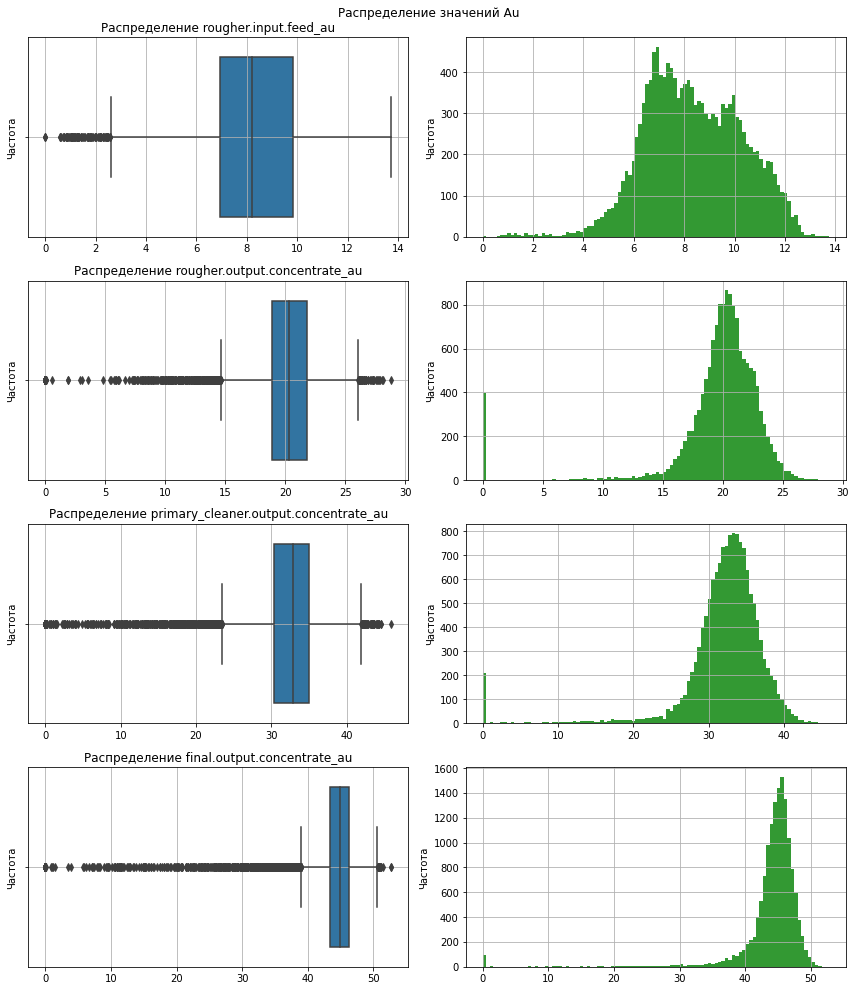

In [14]:
features_list_au = ['rougher.input.feed_au', 'rougher.output.concentrate_au',
                    'primary_cleaner.output.concentrate_au',
                    'final.output.concentrate_au']
get_graphs(train, features_list_au, 'Au')

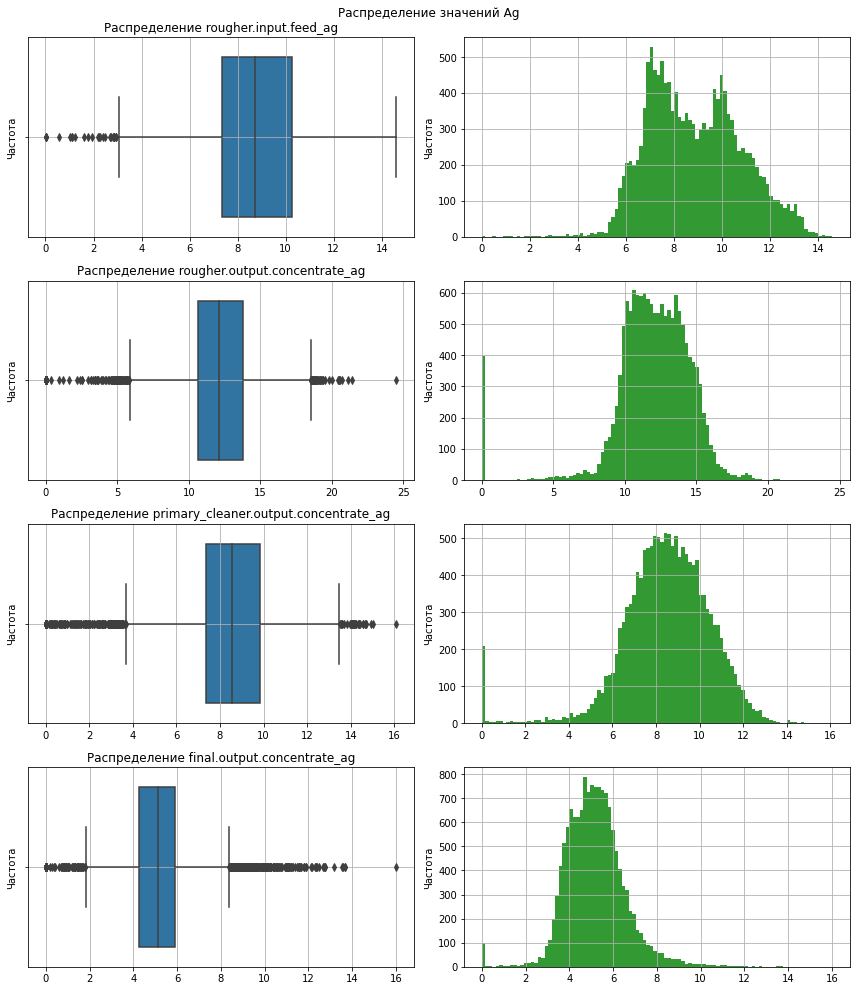

In [15]:
features_list_ag = ['rougher.input.feed_ag', 'rougher.output.concentrate_ag',
                    'primary_cleaner.output.concentrate_ag',
                    'final.output.concentrate_ag']
get_graphs(train, features_list_ag, 'Ag')

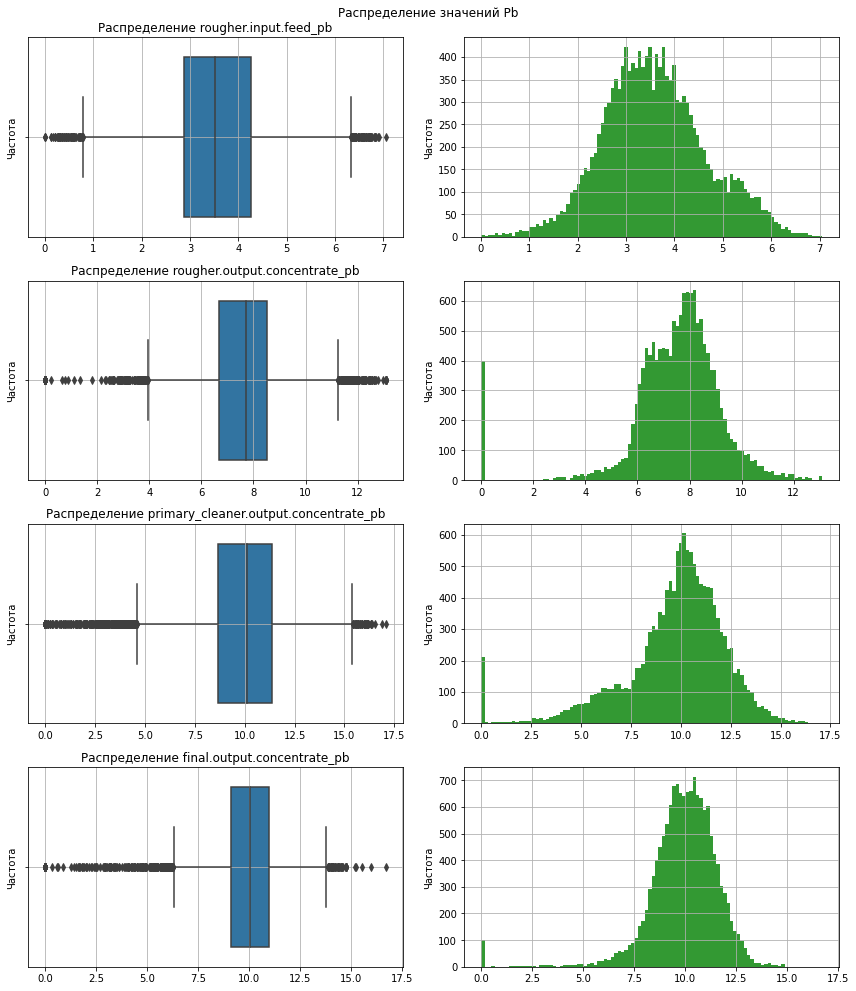

In [16]:
features_list_pb = ['rougher.input.feed_pb', 'rougher.output.concentrate_pb',
                    'primary_cleaner.output.concentrate_pb',
                    'final.output.concentrate_pb']
get_graphs(train, features_list_pb, 'Pb')

Распределение содержания золота, серебра и свинца в руде в среднем имеет равномерное распределение с небольшим кол-вом выбросов.
Когда смесь золотоносной руды поступает на флотацию, содержание серебра и золота распределено с 2-мя пиками, но после флотации пик остается один в распределении значений.

Так как это золотодобывающая процесс, содержание золота от стадии к стадии увеличивается. Примерно так же ведет себя свинец, хотя на финальной стадии среднее значение концентрации остается одинаковым. А вот серебра становится больше после флотации с последующим убыванием на дальнейших этапах.

Так же наблюдаются нулевые значения в данных о концентрации всех трех элементов. Эти данные не попадут в обучение модели, но следует обратить внимание на причину этих нулей.

***2.2.  Сравните распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной***

In [17]:
def get_one_param_kde(column, ax_box=None, ax_kde=None, name=None):
    if ax_box is None or ax_kde is None:
        fig, (ax_box, ax_kde) = plt.subplots(2)

    sns.boxplot(x=column, orient='H', ax=ax_box)
    sns.kdeplot(data=column, ax=ax_kde, shade=True)

    ax_box.set_ylabel('Частота')
    ax_box.set_xlabel(column.name)
    ax_box.grid()
    ax_kde.grid()
    ax_box.set(xlabel='')
    ax_kde.set_ylabel('Плотность вероятности')
    plt.suptitle(f'Распределение значений {name}')

In [18]:
def get_graphs_(data, features_list, name):
    fig, axs = plt.subplots(len(features_list), 2, figsize=(12, len(features_list) * 3.5))

    for i, feature in enumerate(features_list):
        get_one_param_kde(data[feature], ax_box=axs[i, 0], ax_kde=axs[i, 1], name=name)
        axs[i, 0].set_title(f'Распределение {feature}')

    plt.tight_layout()
    plt.show()

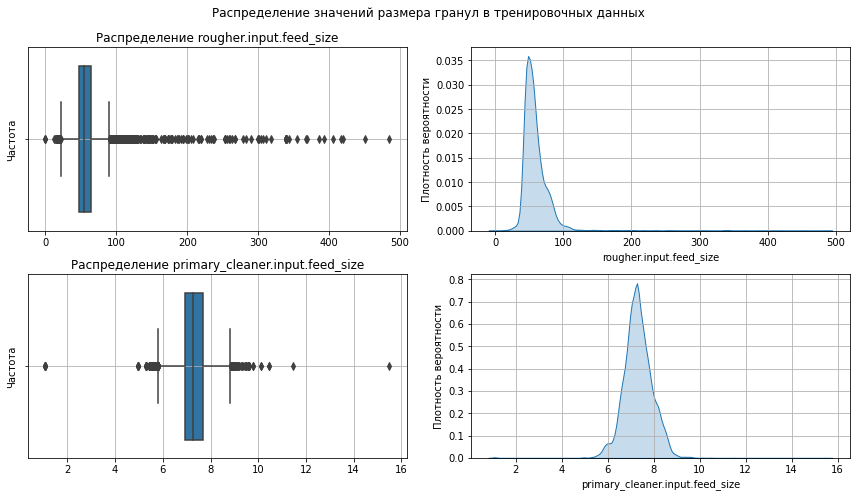

In [19]:
feed_size = ['rougher.input.feed_size', 'primary_cleaner.input.feed_size']
get_graphs_(train, feed_size, 'размера гранул в тренировочных данных')

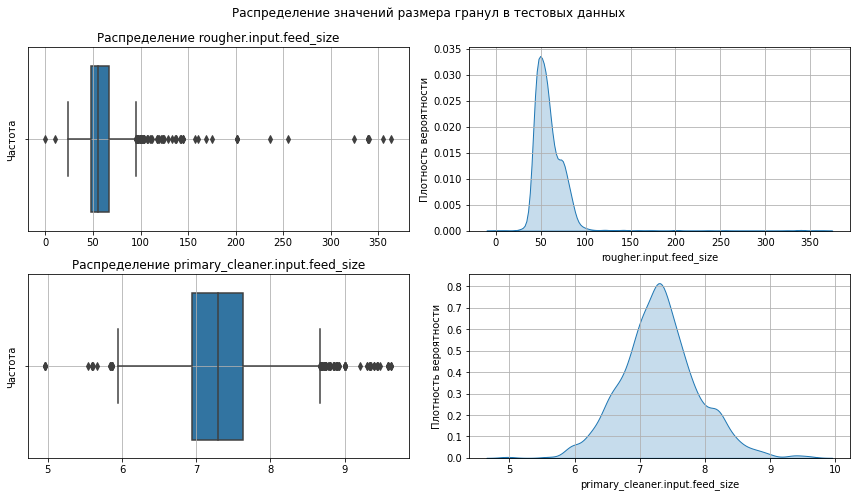

In [20]:
get_graphs_(test, feed_size, 'размера гранул в тестовых данных')

Размеры гранул на трейне и тесте одного порядка. Таким образом, можно утверждать, что данные разбиты на трейн и тес корректно с точки зрения размера гранул

***2.3. Исследуйте суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.***

In [21]:
new_data = train['rougher.input.feed_pb'] + train['rougher.input.feed_au'] + train['rougher.input.feed_ag']
new_data = pd.DataFrame(new_data)
new_data.columns = ['rougher_input']
new_data['rougher_output'] = train['rougher.output.concentrate_pb'] + train['rougher.output.concentrate_au'] + train[
    'rougher.output.concentrate_ag']
new_data['primary_cleaner_output'] = train['primary_cleaner.output.concentrate_pb'] + train[
    'primary_cleaner.output.concentrate_au'] + train['primary_cleaner.output.concentrate_ag']
new_data['final_output'] = train['final.output.concentrate_pb'] + train['final.output.concentrate_au'] + train[
    'final.output.concentrate_ag']
new_data.shape

(14579, 4)

Уберем выбросы

In [22]:
def get_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return Q1,Q3,IQR

In [23]:
concentration_value_by_process = ['rougher_input',
                                  'rougher_output',
                                  'primary_cleaner_output',
                                  'final_output']

In [24]:
for column in concentration_value_by_process:
    q1, q3, iqr = get_iqr(new_data[column])
    new_data = new_data[(new_data[column] > q1 - 1.5 * iqr) & (new_data[column] < q3 + 1.5 * iqr)]

In [25]:
new_data.shape

(12385, 4)

Убрали выбросы, теперь построим графики

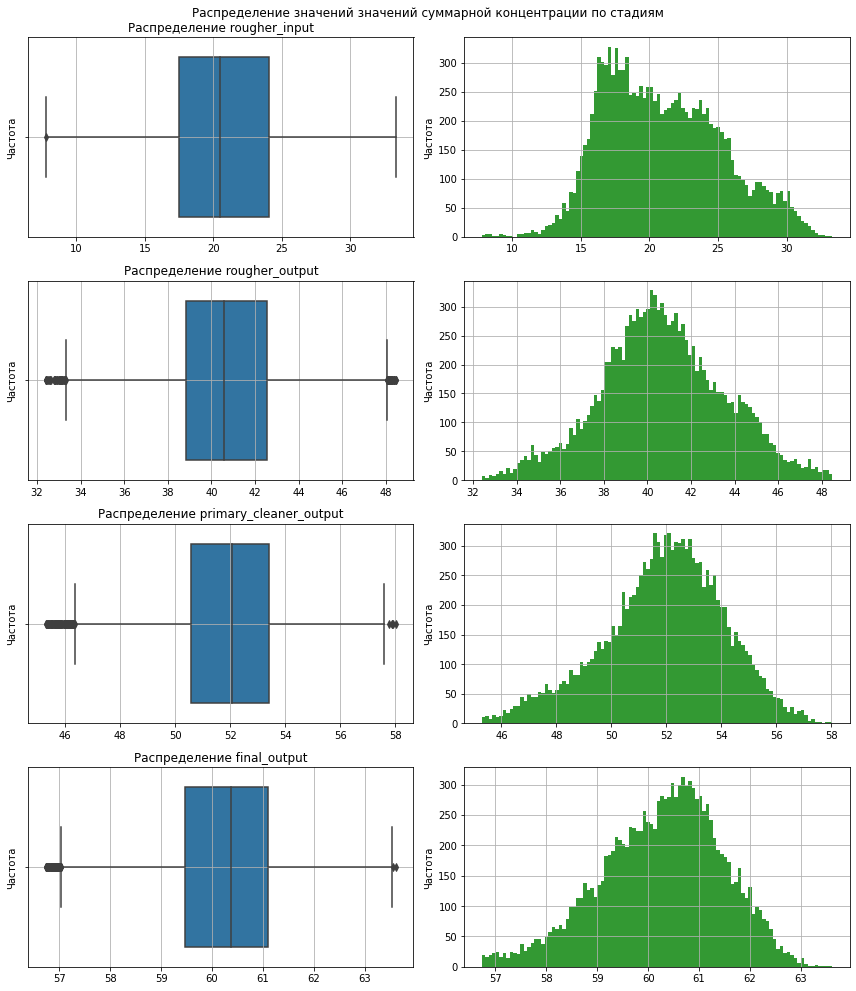

In [26]:
get_graphs(new_data, concentration_value_by_process, 'значений суммарной концентрации по стадиям')

Суммарная концентрация металлов увеличивается от стадии к стадии, что вполне лонично, так как процесс переработки золотоносной руды подразумевает очистку руды для того, чтобы получить концентрат с большей долей полезных металлов, чем в необработанном сырье.

Удалим из тренировочных данных те строки, в которых суммарные концентрации имели аномальные значения

In [27]:
train = train.loc[new_data.index]
train.shape

(12385, 87)

## Модель

Необходимо провести несколько шагов перед обучением модели.
Добавим в тестовые данные целевые признаки для того, чтобы сравнить их с предсказаниями модели на этих данных

In [28]:
test.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,-299.862743,1147.248241,-500.363165,1047.279065,-500.354091,948.756608,-498.439416,849.441918,-499.255503,850.112246,-499.407112,6.168939,9.309852,95.248427,8.078957,6.500000,1.283045,1648.759906,-399.862053,1650.135395,-399.957321,1648.831890,-400.586116,1649.464582,-400.673303,34.940919,-500.150510,30.031867,-500.328335,26.033990,-500.147792,22.952306,-500.037678,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,-299.907308,1154.087804,-500.036580,1054.009756,-500.237335,944.138793,-496.866953,851.589767,-499.040466,851.345606,-499.122561,6.209517,9.297194,98.880538,7.984164,6.500000,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,-399.521344,1651.498591,-399.745329,34.980742,-498.131002,29.968453,-586.013330,25.971737,-499.608392,22.958448,-499.821308,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,-300.124116,1150.754676,-499.986009,1049.182824,-500.014696,948.085464,-499.997003,850.170086,-500.270334,849.557905,-500.198702,7.358308,9.000624,119.497545,8.003752,6.500000,1.259741,1647.368779,-399.788506,1648.395206,-400.166490,1648.953828,-400.468641,1649.821569,-400.071884,34.952967,-501.204647,29.927025,-500.106628,25.978253,-499.890060,23.004376,-500.014529,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,-299.778385,1152.512559,-500.338106,1052.601592,-499.695075,955.171539,-500.294989,851.957342,-499.779541,850.765662,-501.030559,6.929364,8.920717,108.080163,7.970121,6.660000,0.774909,1652.660845,-399.702218,1651.203128,-400.291472,1651.924848,

In [29]:
test.shape

(4860, 53)

In [30]:
test = test.merge(full_raw[['rougher.output.recovery', 'date', 'final.output.recovery']], on='date')
test.shape

(4860, 55)

Оставим в трэйне только те столбцы, которые есть в тесте.

In [31]:
print('размер таблицы train исходный      ', train.shape)
common_columns = train.columns.intersection(test.columns)
train = train.loc[:, common_columns]
print('размер таблицы train после удаления', train.shape)

размер таблицы train исходный       (12385, 87)
размер таблицы train после удаления (12385, 55)


Уберем корреллирующие признаки

In [32]:
correlation_matrix = train.corr()
threshold = 0.9
high_correlation_data = correlation_matrix[correlation_matrix.abs() > threshold]

print("Данные с корреляцией больше", threshold)
m = high_correlation_data[high_correlation_data.count().values > 1]
m.count().sort_values(ascending=False)

correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

correlated_features

Данные с корреляцией больше 0.9


{'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'rougher.state.floatbank10_c_air',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_d_air',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_f_air',
 'rougher.state.floatbank10_f_level',
 'secondary_cleaner.state.floatbank2_b_level'}

In [33]:
train.drop(columns=correlated_features, inplace=True)
test.drop(columns=correlated_features, inplace=True)

In [34]:
train.shape, test.shape

((12385, 44), (4860, 44))

Теперь признаки менее скоррелированны.

Удалим уникальный признак date из обеих выборок, так как он совершенно неинформативен.

In [35]:
train = train.drop(['date'], axis=1)
test = test.drop(['date'], axis=1)

In [36]:
test.sample()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_e_air,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
860,0.885875,5.670174,0.77428,34.041765,559.433709,66.558732,1.701654,5.202725,1200.946625,-300.287506,1302.642845,-498.24954,1099.544916,1.697719,5.202826,31.651403,4.723428,5.95,0.987799,1698.953561,-499.175604,-499.632474,1700.293614,-499.838992,34.944585,-499.835105,27.981023,35.967321,-499.629511,24.958532,-499.744596,29.995235,-498.548638,19.882446,-499.746867,24.987307,-499.51421,22.969566,-499.984969,25.000726,-499.972589,76.879907,24.764549


Необходимо поделить датасеты на признаки и таргет для дальнейших шагов

In [37]:
train_features = train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
train_target_rougher = train['rougher.output.recovery']
train_target_final = train['final.output.recovery']
test_features = test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
test_target_rougher = test['rougher.output.recovery']
test_target_final = test['final.output.recovery']

train_features.shape, train_target_rougher.shape, train_target_final.shape, \
test_features.shape, test_target_rougher.shape, test_target_final.shape

((12385, 41), (12385,), (12385,), (4860, 41), (4860,), (4860,))

Необходимо произвести масштабирование признаков, так как разброс данных разный

In [38]:
scaler = StandardScaler()
scaler.fit(train_features)

train_features = pd.DataFrame(scaler.transform(train_features), columns=train_features.columns)
test_features = pd.DataFrame(scaler.transform(test_features), columns=test_features.columns)
test_features.sample(5)

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_e_air,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
2443,-1.063738,-0.918722,-0.404864,-0.372336,-0.016116,-0.376909,1.375922,-0.963267,-0.638724,0.838498,0.401558,1.145353,0.669791,1.284965,-0.801573,-0.789163,-0.297043,-0.584955,-0.958233,0.839666,-0.251292,-0.228022,0.627815,-0.272455,0.301232,0.062364,0.194880,-0.489073,-0.280399,-0.383751,-0.160697,-0.129009,-0.336414,-0.345275,1.272145,0.483972,-0.343543,0.202375,-0.365293,-0.737641,0.152655
1472,2.006857,2.558268,2.033590,0.912378,0.272175,-0.294192,0.277643,1.180723,1.624390,0.845038,-0.715306,-0.621090,-1.030997,0.319191,1.071417,1.738523,1.872410,1.622743,0.130709,0.100785,3.240756,3.197831,0.218718,2.064223,0.078235,0.055921,0.552827,-0.000174,-0.287405,0.163572,-0.162402,0.270561,-0.339337,0.064979,-0.612864,-0.824892,-0.351727,-0.563472,-0.356341,-1.295389,0.184086
4183,-1.417801,-1.060475,-1.042617,-1.499608,-0.324641,-0.569293,-0.456970,-1.523328,-0.648950,-1.252981,0.388245,-0.625013,0.665468,-0.327523,-1.288482,-1.563292,-0.302864,0.249064,-0.465214,-1.476494,-0.201951,-0.251571,-0.607915,-0.263740,-0.649867,0.152026,-0.336496,-0.831950,-0.287394,-0.027754,-0.162399,-1.684789,-0.352830,-1.396569,-1.071800,-1.379115,-0.334685,-1.133487,-0.383654,-0.216945,0.157583
3197,0.196384,0.346939,-0.707194,-2.944032,-1.378257,-0.904627,-1.375449,-0.588983,-0.646093,-1.242339,0.674580,-0.615973,0.095700,-1.133096,-0.471146,-1.725994,-0.278615,0.478011,-0.507286,0.090298,-0.235627,-0.179182,0.214695,-1.331070,0.112076,0.060949,0.563523,0.992891,-0.303410,1.597149,-0.161613,-0.313691,-0.341603,0.059342,-0.613614,-0.354823,-0.369582,0.007651,-0.371967,0.169781,0.132575
1925,-0.587803,-1.417022,0.010317,-2.162990,-1.856409,0.015449,-0.074879,-1.211469,-0.632971,0.841852,-0.153302,-0.613111,-0.479934,0.017092,-1.029725,-0.572768,-1.524452,-2.154873,0.332879,-2.258560,-0.987529,1.541831,-1.130974,-0.287558,-0.449531,0.061563,-0.475671,-0.821696,-0.283410,-1.273225,-0.155583,-0.709438,-0.347487,-0.361019,0.978297,-0.810845,-0.353722,-0.563633,-0.371475,-1.292501,0.143416


Напишем функцию для подсчета целевой метрики sMAPE

In [39]:
def smape(target, predictions):
    return (((abs(target - predictions)) / ((abs(target) + abs(predictions)) / 2)).sum() / target.shape[0]) * 100

In [40]:
custome_score = make_scorer(smape, greater_is_better=False)

In [41]:
lr = LinearRegression()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()

In [42]:
params_dt = {'max_leaf_nodes': range(10, 21, 5),
             'max_depth': range(3, 10, 3),
             'min_samples_leaf': [5]}

In [43]:
params_rf = {'n_estimators': range(50, 101, 25),
             'max_depth': range(5, 21, 5),
             'min_samples_leaf': [5]}

In [44]:
def find_best_params(model, params):
    grid = GridSearchCV(model, params, cv=5, scoring=custome_score)
    grid.fit(train_features, train_target_rougher)
    return grid.best_params_

In [45]:
%%time
find_best_params(rf, params_rf)

Wall time: 32min 5s


{'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 75}

In [46]:
%%time
find_best_params(dt, params_dt)

Wall time: 10.7 s


{'max_depth': 6, 'max_leaf_nodes': 15, 'min_samples_leaf': 5}

In [47]:
lr = LinearRegression()
rf = RandomForestRegressor(random_state = r, max_depth=5, min_samples_leaf=5, n_estimators=50)
dt = DecisionTreeRegressor(random_state = r, max_depth=6, max_leaf_nodes=15, min_samples_leaf=5)

In [48]:
models = [lr, rf, dt]

In [49]:
def get_smape(model):
    model.fit(train_features, train_target_rougher)
    preds = model.predict(test_features)
    a = smape(test_target_rougher, preds)
    model.fit(train_features, train_target_final)
    preds2 = model.predict(test_features)
    b = smape(test_target_final, preds2)
    print(f'for {model}: {a * 0.25 + b * 0.75:.2f}%')

In [50]:
for m in models:
    get_smape(m)

for LinearRegression(): 7.06%
for RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=50,
                      random_state=12345): 6.42%
for DecisionTreeRegressor(max_depth=6, max_leaf_nodes=15, min_samples_leaf=5,
                      random_state=12345): 6.84%


Лучшей моделью является рандомный лес

In [51]:
model = rf
model.fit(train_features, train_target_rougher)
preds = model.predict(test_features)
smape_rougher = smape(test_target_rougher, preds)
print(f'{smape_rougher:.2f}%')

3.73%


In [52]:
model.fit(train_features, train_target_final)
preds = model.predict(test_features)
smape_final = smape(test_target_final, preds)
print(f'{smape_final:.2f}%')

7.32%


Сравнием предсказания с константной моделью

In [53]:
pred = pd.Series(train_target_rougher.mean(), train_target_rougher.index)
smape_rougher_mean = smape(test_target_rougher, pred)
print(f'{smape_rougher_mean:.2f}%')

5.29%


In [54]:
pred = pd.Series(train_target_final.mean(), train_target_final.index)
smape_final_mean = smape(test_target_final, pred)
print(f'{smape_final_mean:.2f}%')

7.95%


Модель предсказывает с метрикой smape чуть больше нуля (если smape = 0, модель предсказывает идеально), это значит, что разница между предсказаниями модели и реальными данными относительно невелика. Сравнивая предсказания модели со средним, можно отметить, что модель чуть лучше справляется с этапом final и хорошо на этапе rougher

Посчитаем итоговый smape

In [55]:
summarized_smape = smape_rougher * 0.25 + smape_final * 0.75
print(f'{summarized_smape:.2f}%')

6.42%


Таким образом, мы подготовили прототип модели машинного обучения для «Цифры». Перед нами стояла задача построения модели, которая предскажет коэффициент восстановления золота из золотосодержащей руды.

В ходе выполнения проекта, были проведены исследования полученных датасетов, проанализированы данные и их взаимосвязи. Были найдены и устранены аномальные значения, заполнены пропуски. Перед построениием моделей, были масштабированы, очищены от нерелевантных признаков данные.

Были найдены нулевые значения среди измеренных показателей процессов обработки руды. Следует обратить на них внимание, чтобы найти и устранить их причину.

Далее были исследованы 3 модели - линейная регрессия, рандомный лес и дерево решений, в ходе которого наилучшей была выбрана модель рандомный лес.